In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load Data

In [3]:
cohort_1_w1w2 = pd.read_csv('/Users/cguy/kelstuff/ga_summer_2016/cohort_1_w1w2.csv')
cohort_1_w1w2.head()

/Users/cguy/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,9,10,11,12,16,20,23,26,29,30,31,32,33,36,38,39,40,41,43,44,45,46,51,52,53,56,59,60,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,AcSuppSv,AgeMP,AmIAKN,Asian,Baseline,BlkAfrAm,BudgetSv,CareerSv,CurrFTE,...,Sex,SpecEdSv,St,StFCID,StFIPS,SubAbuse,TribeSv,Wave,Weight,White
0,0,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450290395006,2.0,Yes,0.0,Wave 1: Age 17 Baseline Survey,1.26,1.0
1,4,0.0,17.0,1.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450448396586,2.0,No,1.0,Wave 1: Age 17 Baseline Survey,1.36,0.0
2,10,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450540097503,2.0,No,0.0,Wave 1: Age 17 Baseline Survey,1.26,1.0
3,14,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,1.0,0.0,AK,AK450652098623,2.0,No,0.0,Wave 1: Age 17 Baseline Survey,3.31,1.0
4,17,0.0,17.0,1.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,1.0,AK,AK451448406587,2.0,No,1.0,Wave 1: Age 17 Baseline Survey,1.36,0.0


In [4]:
# Seperate dataframe into feature vars and target vars

targets = cohort_1_w1w2[['CurrenRoll','HighEdCert', 'Wave']]


features = cohort_1_w1w2[['ILNAsv','AcSuppSv','PSEdSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv','HlthEdSv',\
                     'FamSuppSv','MentorSv','EdLevlSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv','DelinqntSv','Wave']]


In [5]:
# # Create column for number of services received

services_count = features.T
services_count = services_count.drop('Wave')
services_count = services_count.drop('DelinqntSv')
services_count = services_count.drop('EdLevlSv')


features['Num_services'] = (services_count == 1).sum()
features.head(10)

/Users/cguy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,EdLevlSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,DelinqntSv,Wave,Num_services
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0.0,Wave 1: Age 17 Baseline Survey,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,Wave 1: Age 17 Baseline Survey,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,1.0,0.0,Wave 1: Age 17 Baseline Survey,3
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,Wave 1: Age 17 Baseline Survey,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0.0,Wave 1: Age 17 Baseline Survey,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,Wave 1: Age 17 Baseline Survey,1
6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,Wave 1: Age 17 Baseline Survey,4
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0.0,Wave 1: Age 17 Baseline Survey,2
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,Wave 1: Age 17 Baseline Survey,1
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,Wave 1: Age 17 Baseline Survey,2


In [7]:
#  # with num_services and state as one feature

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features_2 = features.copy()

features_w2 = features_2[features_2.Wave == "Wave 2: Age 19 Followup"]
features_w2 = features_w2.drop('Wave', axis = 1)

features_w2.head()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,EdLevlSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,DelinqntSv,Num_services
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0.0,2
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,1.0,0.0,3
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0.0,2


In [8]:
features_w2 = features_w2[['Num_services','EdLevlSv','HousEdSv','AcSuppSv','BudgetSv','CareerSv']]
features_w2.head()

,Num_services,EdLevlSv,HousEdSv,AcSuppSv,BudgetSv,CareerSv
7328,2,11.0,1.0,0.0,0.0,0.0
7329,1,11.0,0.0,0.0,0.0,0.0
7330,3,11.0,0.0,0.0,0.0,0.0
7331,1,11.0,0.0,0.0,0.0,0.0
7332,2,11.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

targets_w2_ = targets[targets.Wave == "Wave 2: Age 19 Followup"]
targets_w2_ = targets_w2_.drop('Wave', axis = 1)


targets_w2 = targets_w2_.copy()

for column in targets_w2:
    targets_w2[column] = le.fit_transform(targets_w2[column])
targets_w2.head()

/Users/cguy/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,CurrenRoll,HighEdCert
7328,2,7
7329,2,5
7330,3,5
7331,2,5
7332,2,5


In [10]:
targets_labels = targets[targets.Wave == "Wave 2: Age 19 Followup"]

targets_labels.HighEdCert.value_counts()

Blank                      2813
High school diploma/GED    2508
None of the above          1705
Declined                     95
Vocational certificate       62
Vocational license           19
Associate's Degree            7
Higher degree                 7
Bachelor's Degree             2
Name: HighEdCert, dtype: int64

In [11]:
targets_w2.HighEdCert.value_counts()

3    2813
5    2508
7    1705
0     110
4      95
8      62
9      19
6       7
1       7
2       2
Name: HighEdCert, dtype: int64

In [12]:
targets_labels.CurrenRoll.value_counts()

Blank       2808
Yes         2447
No          1996
Declined      77
Name: CurrenRoll, dtype: int64

In [13]:
targets_w2.CurrenRoll.value_counts()

0    2808
3    2447
2    1996
1      77
Name: CurrenRoll, dtype: int64

In [14]:
# y = 0 v 1, 
    # where 1 = Vocational certificate (8), Vocational license (9), Associate's Degree (6), 
            #   Higher degree (1), Bachelor's Degree (2)
    # or 1 = when CurrenRoll == 3

def determine_Success(row):
    column_1 = 'HighEdCert'
    column_2 = 'CurrenRoll'
    if row[column_1] == 1:
        val = 1
    elif row[column_1] ==  2:
        val = 1
    elif row[column_1] ==  6:
        val = 1
    elif row[column_1] ==  9:
        val = 1
    elif row[column_1] ==  8:
        val = 1
    elif row[column_2] == 3:
        val = 1
    else:
        val = 0
    return val
    
targets_w2_final = targets_w2.copy()

targets_w2_final['Success'] = targets_w2_final.apply(determine_Success, axis=1)
targets_w2_final.head(10)



,CurrenRoll,HighEdCert,Success
7328,2,7,0
7329,2,5,0
7330,3,5,1
7331,2,5,0
7332,2,5,0
7333,3,7,1
7334,3,7,1
7335,2,5,0
7336,2,7,0
7337,3,7,1


In [15]:
targets_w2_final['Success'].value_counts()

0    4830
1    2498
Name: Success, dtype: int64

# Functions for Models

In [16]:
## And a function to plot your confusion matrix:
import matplotlib.patheffects as path_effects
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', labels=['Positive','Negative'], cmap=plt.cm.Blues):
    
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                       path_effects.Normal()]) #The last line here adds a text outline

In [17]:
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print cm
    print cr
    
    return a

In [18]:
# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for Positive Education Outcome', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

# Models for X1: Features with no state var

In [19]:
y = targets_w2_final['Success']
X1 = features_w2


In [20]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42, stratify=y)


all_models = {}

In [21]:
from sklearn.neighbors import KNeighborsClassifier

a = evaluate_model(KNeighborsClassifier())

[[1104  345]
 [ 581  169]]
             precision    recall  f1-score   support

          0       0.66      0.76      0.70      1449
          1       0.33      0.23      0.27       750

avg / total       0.54      0.58      0.56      2199



In [22]:
from sklearn.grid_search import GridSearchCV

params = {'n_neighbors': range(2,60)}

gsknn = GridSearchCV(KNeighborsClassifier(),
                     params, n_jobs=-1,
                     cv=KFold(len(y), n_folds=3, shuffle=True))

In [23]:
gsknn.fit(X1, y)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=7328, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [24]:
gsknn.best_params_


{'n_neighbors': 46}

In [25]:
gsknn.best_score_

0.65938864628820959

In [26]:
evaluate_model(gsknn.best_estimator_)


[[1424   25]
 [ 730   20]]
             precision    recall  f1-score   support

          0       0.66      0.98      0.79      1449
          1       0.44      0.03      0.05       750

avg / total       0.59      0.66      0.54      2199



0.65666211914506589

In [27]:
all_models['knn'] = {'model': gsknn.best_estimator_,
                     'score': a}

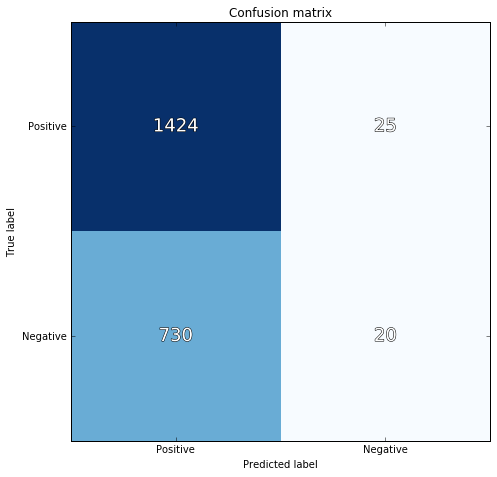

In [28]:
preds = gsknn.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

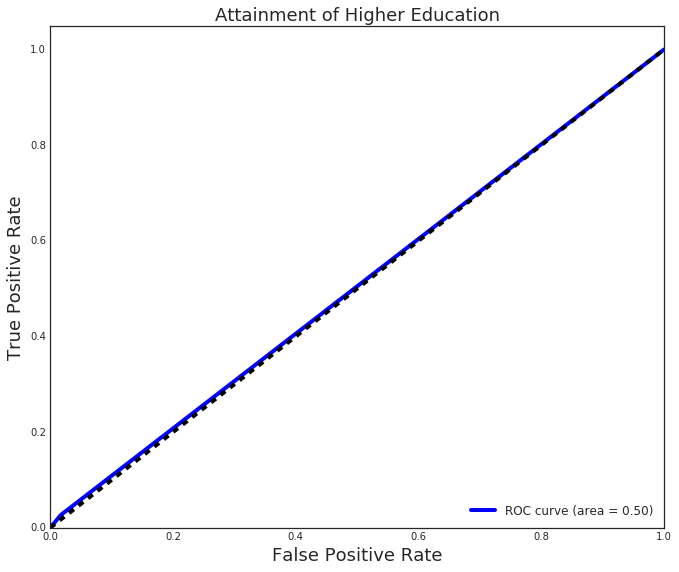

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn.ensemble import BaggingClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier())

In [31]:
evaluate_model(baggingknn)


[[1299  150]
 [ 661   89]]
             precision    recall  f1-score   support

          0       0.66      0.90      0.76      1449
          1       0.37      0.12      0.18       750

avg / total       0.56      0.63      0.56      2199



0.63119599818099137

In [32]:
bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}


gsbaggingknn = GridSearchCV(baggingknn,
                            bagging_params, n_jobs=-1,
                            cv=KFold(len(y), n_folds=3, shuffle=True))

In [33]:
gsbaggingknn.fit(X1, y)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=7328, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20], 'max_samples': [0.7, 1.0], 'bootstrap_features': [True, False], 'max_features': [0.7, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [34]:
gsbaggingknn.best_params_

{'bootstrap_features': True,
 'max_features': 0.7,
 'max_samples': 0.7,
 'n_estimators': 20}

In [35]:
all_models['gsbaggingknn'] = {'model': gsbaggingknn.best_estimator_,
                              'score': evaluate_model(gsbaggingknn.best_estimator_)}


[[1445    4]
 [ 747    3]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.43      0.00      0.01       750

avg / total       0.58      0.66      0.53      2199



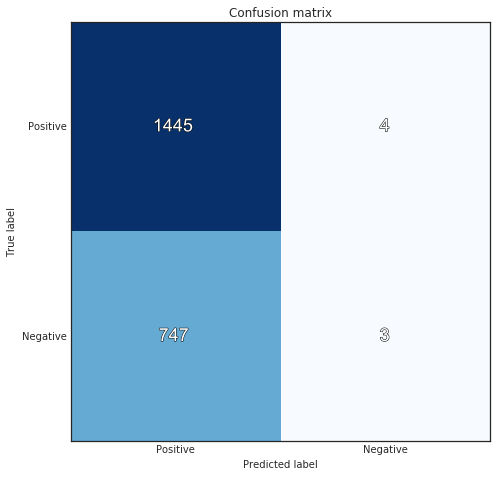

In [36]:
preds = gsbaggingknn.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)


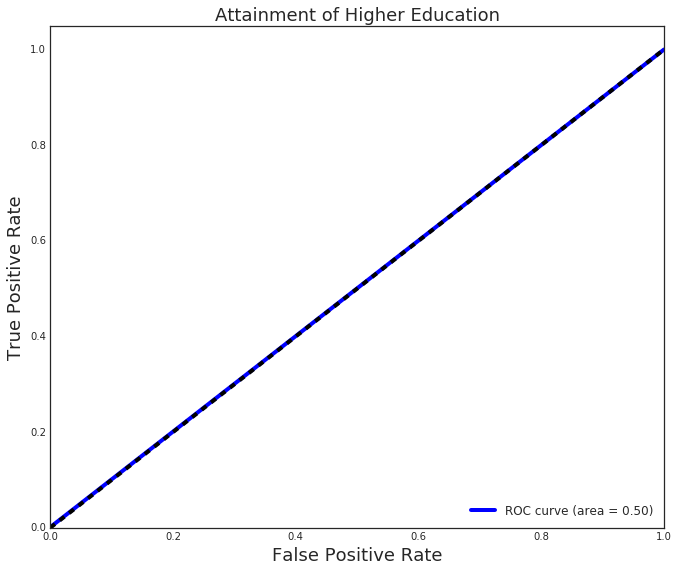

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
all_models['lr'] = {'model': lr,
                    'score': evaluate_model(lr)}

[[1449    0]
 [ 750    0]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.00      0.00      0.00       750

avg / total       0.43      0.66      0.52      2199



/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


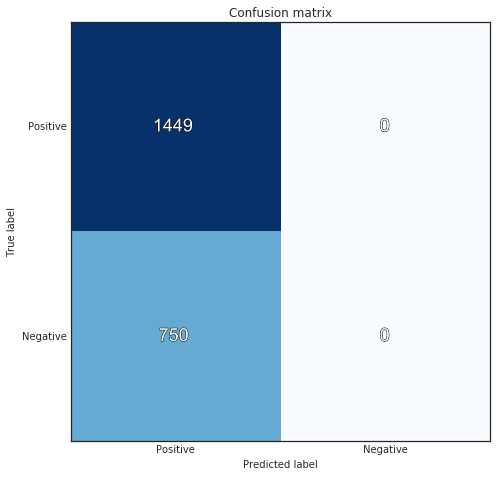

In [39]:
preds = lr.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

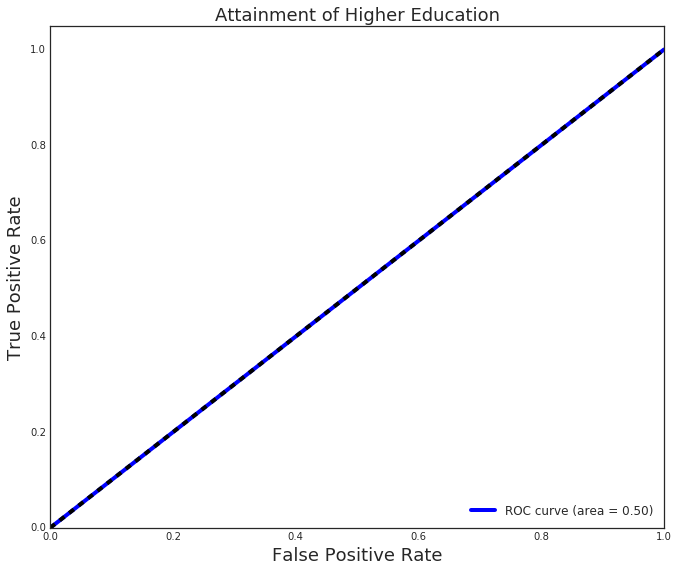

In [40]:
Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [41]:
params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
          'penalty': ['l1', 'l2']}

gslr = GridSearchCV(lr,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gslr.fit(X1, y)

print gslr.best_params_
print gslr.best_score_

all_models['gslr'] = {'model': gslr.best_estimator_,
                             'score': evaluate_model(gslr.best_estimator_)}

{'penalty': 'l1', 'C': 0.001}
0.659115720524
[[1449    0]
 [ 750    0]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.00      0.00      0.00       750

avg / total       0.43      0.66      0.52      2199



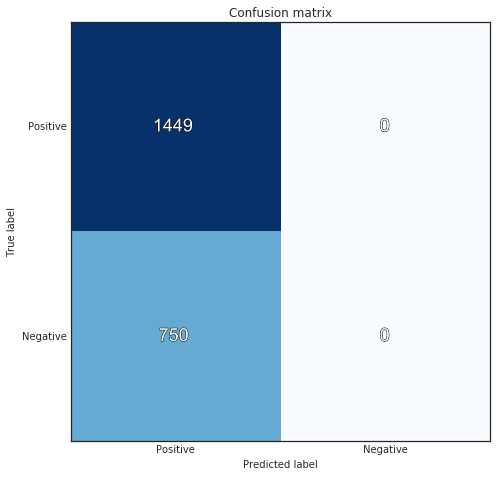

In [42]:
preds = gslr.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

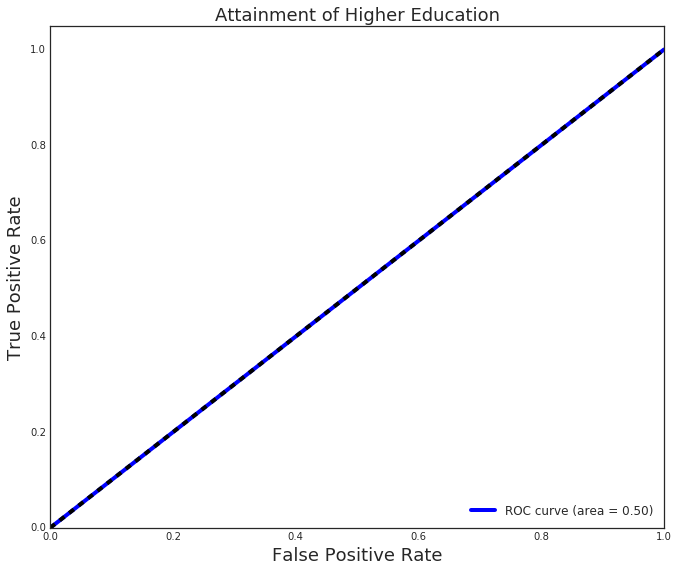

In [43]:
Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [44]:
gsbagginglr = GridSearchCV(BaggingClassifier(gslr.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbagginglr.fit(X1, y)

print gsbagginglr.best_params_
print gsbagginglr.best_score_

all_models['gsbagginglr'] = {'model': gsbagginglr.best_estimator_,
                             'score': evaluate_model(gsbagginglr.best_estimator_)}


{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 10, 'bootstrap_features': True}
0.659115720524
[[1449    0]
 [ 750    0]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.00      0.00      0.00       750

avg / total       0.43      0.66      0.52      2199



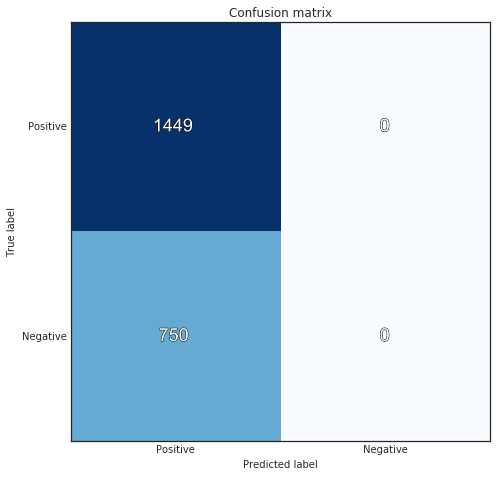

In [45]:
preds = gsbagginglr.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

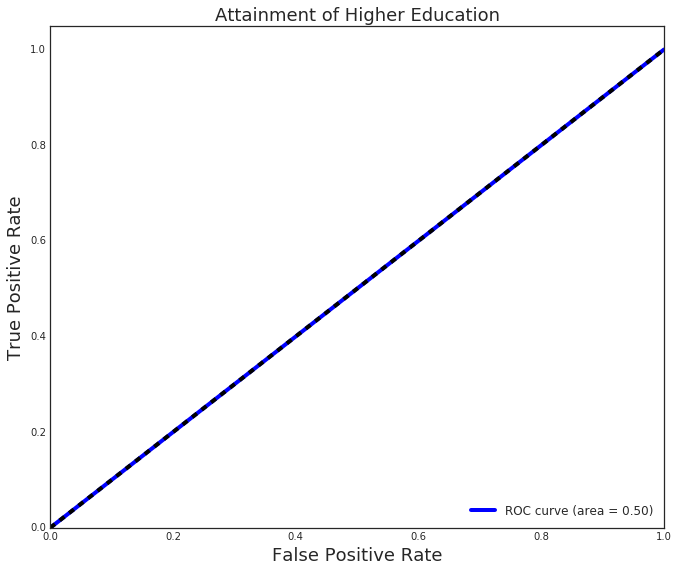

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
all_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}

[[1328  121]
 [ 681   69]]
             precision    recall  f1-score   support

          0       0.66      0.92      0.77      1449
          1       0.36      0.09      0.15       750

avg / total       0.56      0.64      0.56      2199



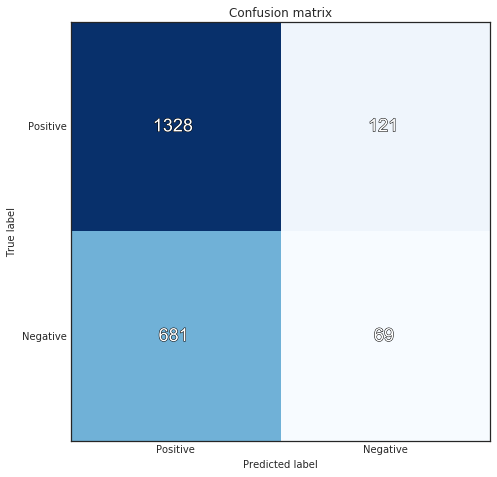

In [48]:
preds = dt.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

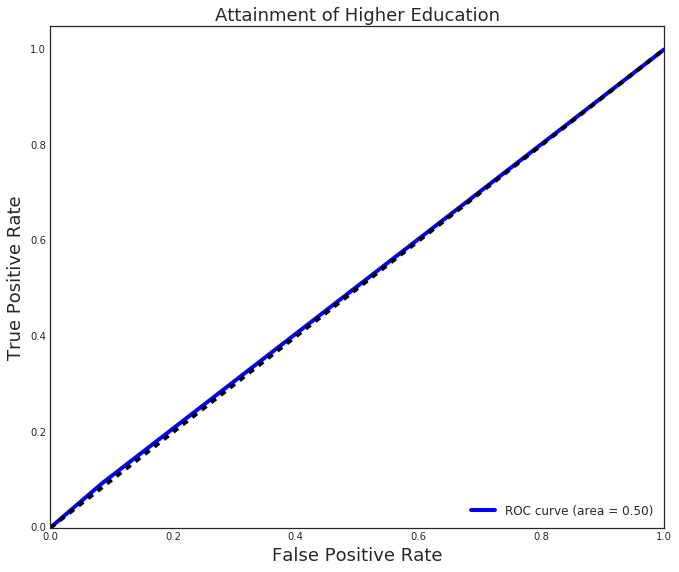

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [50]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}

gsdt = GridSearchCV(dt,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsdt.fit(X1, y)
print gsdt.best_params_
print gsdt.best_score_

all_models['gsdt'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model(gsdt.best_estimator_)}

{'min_samples_split': 5, 'splitter': 'random', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}
0.65884279476
[[1431   18]
 [ 743    7]]
             precision    recall  f1-score   support

          0       0.66      0.99      0.79      1449
          1       0.28      0.01      0.02       750

avg / total       0.53      0.65      0.53      2199



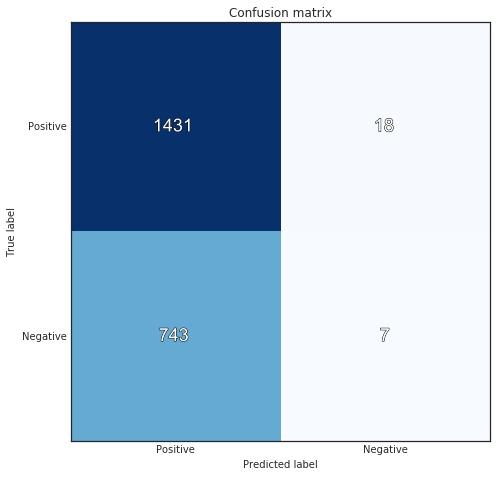

In [51]:
preds = gsdt.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

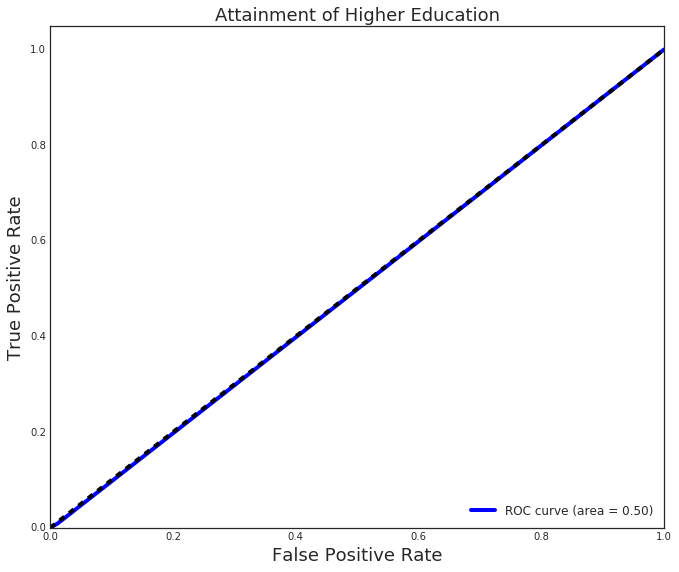

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [53]:
gsbaggingdt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingdt.fit(X1, y)

print gsbaggingdt.best_params_
print gsbaggingdt.best_score_

all_models['gsbaggingdt'] = {'model': gsbaggingdt.best_estimator_,
                             'score': evaluate_model(gsbaggingdt.best_estimator_)}

{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 20, 'bootstrap_features': False}
0.659252183406
[[1449    0]
 [ 750    0]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.00      0.00      0.00       750

avg / total       0.43      0.66      0.52      2199



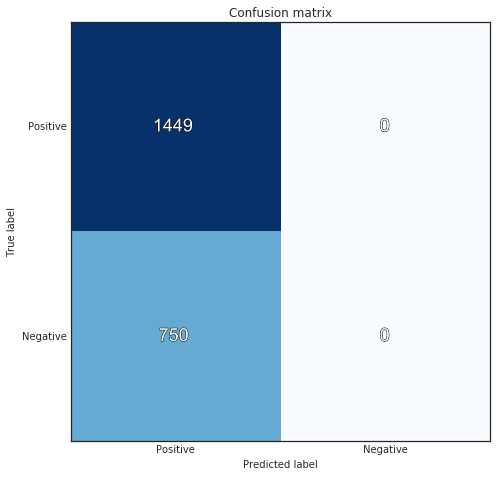

In [54]:
preds = gsbaggingdt.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

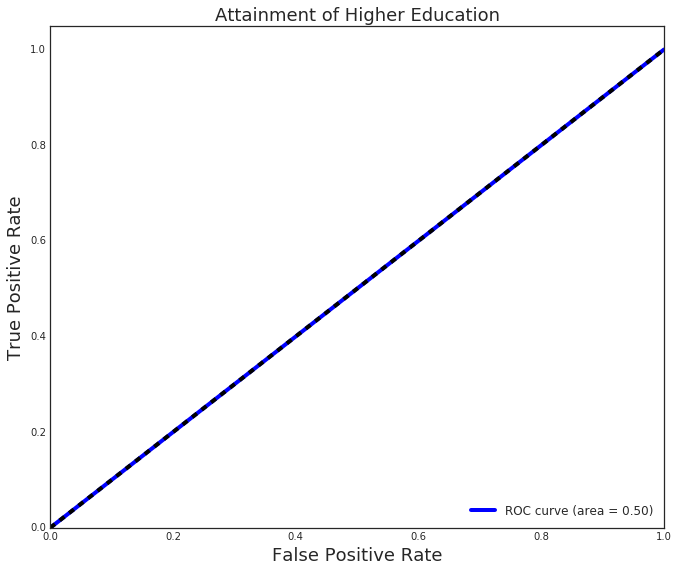

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [56]:
from sklearn.svm import SVC

svm = SVC()
all_models['svm'] = {'model': svm,
                     'score': evaluate_model(svm)}

[[1448    1]
 [ 750    0]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.00      0.00      0.00       750

avg / total       0.43      0.66      0.52      2199



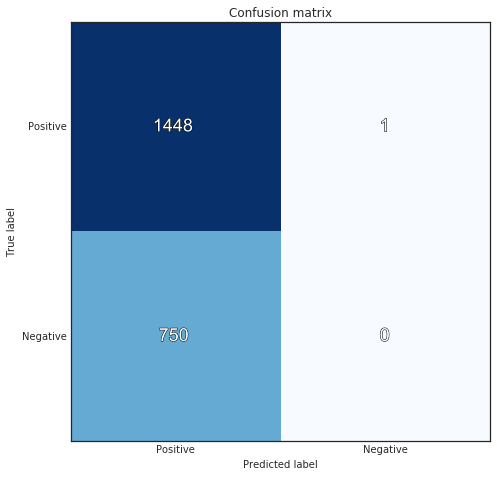

In [57]:
preds = svm.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

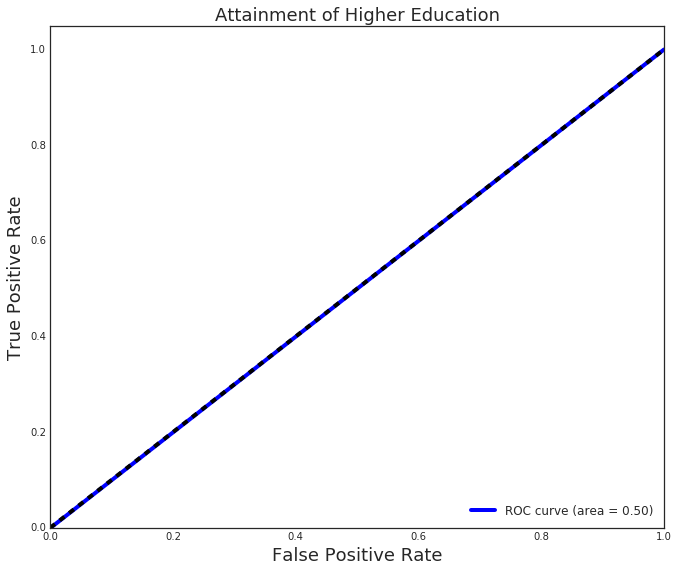

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [59]:
params = {'C': [0.01, 0.1, 1.0, 10.0, 30.0, 100.0],
          'gamma': ['auto', 0.1, 1.0, 10.0],
          'kernel': ['linear', 'rbf']}


gssvm = GridSearchCV(svm,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gssvm.fit(X1, y)
print gssvm.best_params_
print gssvm.best_score_

all_models['gssvm'] = {'model': gssvm.best_estimator_,
                      'score': evaluate_model(gssvm.best_estimator_)}

{'kernel': 'linear', 'C': 0.01, 'gamma': 'auto'}
0.659115720524
[[1449    0]
 [ 750    0]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.00      0.00      0.00       750

avg / total       0.43      0.66      0.52      2199



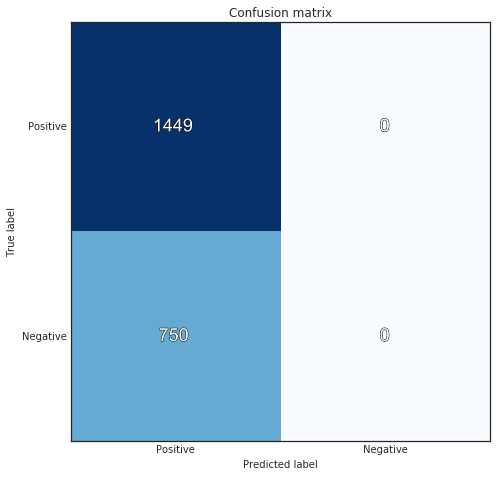

In [60]:
preds = gssvm.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

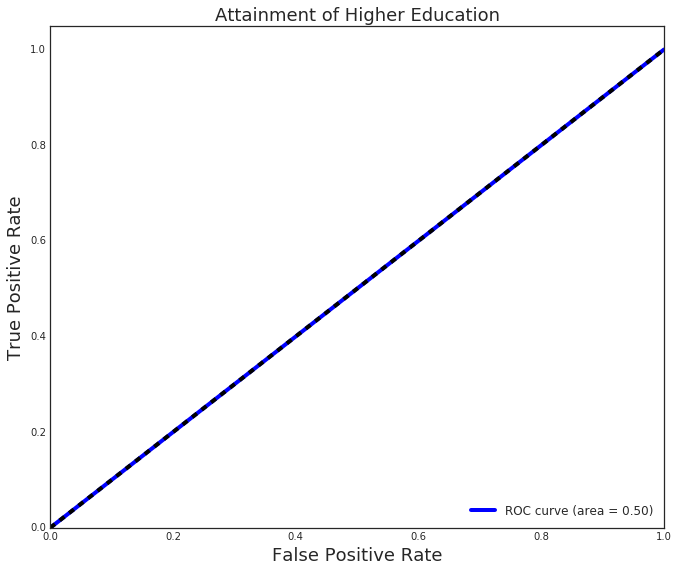

In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [62]:
gsbaggingsvm = GridSearchCV(BaggingClassifier(gssvm.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingsvm.fit(X1, y)

print gsbaggingsvm.best_params_
print gsbaggingsvm.best_score_

all_models['gsbaggingsvm'] = {'model': gsbaggingsvm.best_estimator_,
                             'score': evaluate_model(gsbaggingsvm.best_estimator_)}

{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 10, 'bootstrap_features': True}
0.659115720524
[[1449    0]
 [ 750    0]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.00      0.00      0.00       750

avg / total       0.43      0.66      0.52      2199



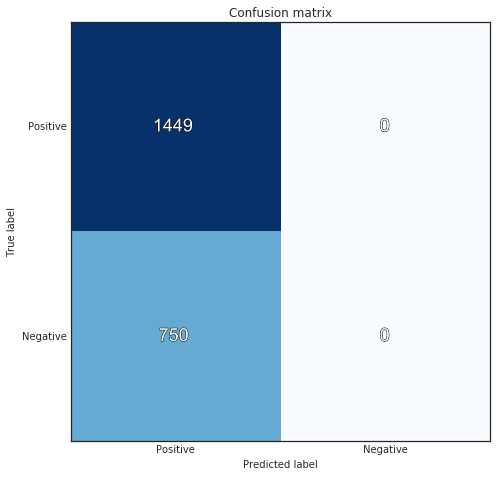

In [63]:
preds = gsbaggingsvm.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

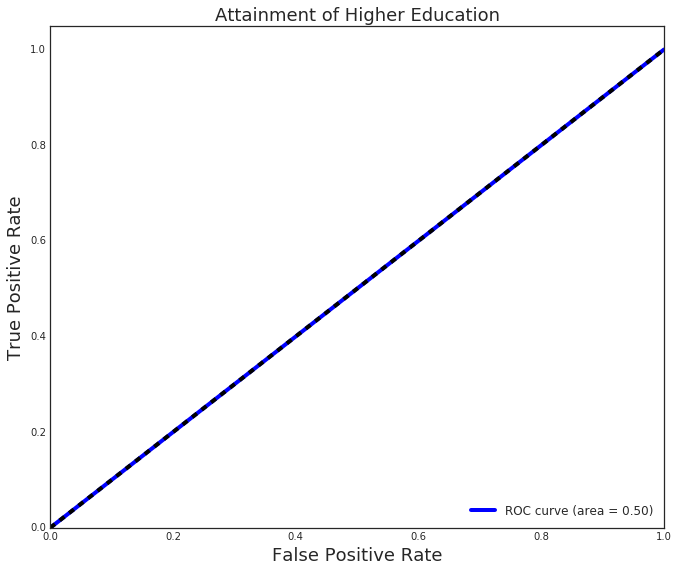

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier()
all_models['rf'] = {'model': rf,
                    'score': evaluate_model(rf)}



et = ExtraTreesClassifier()
all_models['et'] = {'model': et,
                    'score': evaluate_model(et)}

[[1285  164]
 [ 658   92]]
             precision    recall  f1-score   support

          0       0.66      0.89      0.76      1449
          1       0.36      0.12      0.18       750

avg / total       0.56      0.63      0.56      2199

[[1328  121]
 [ 683   67]]
             precision    recall  f1-score   support

          0       0.66      0.92      0.77      1449
          1       0.36      0.09      0.14       750

avg / total       0.56      0.63      0.55      2199



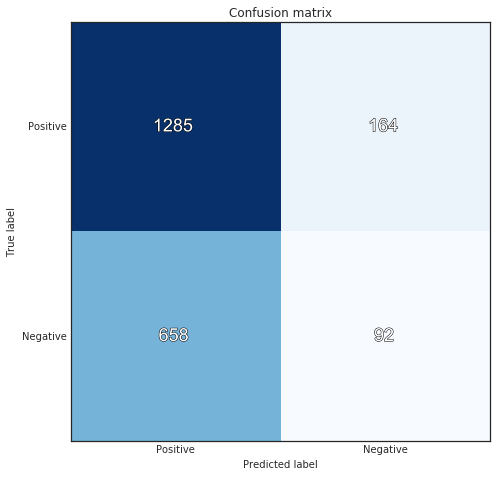

In [66]:
preds = rf.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

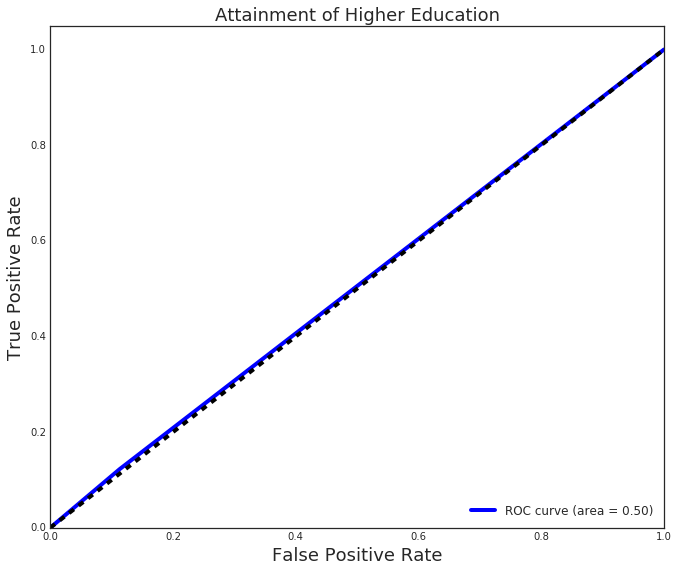

In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

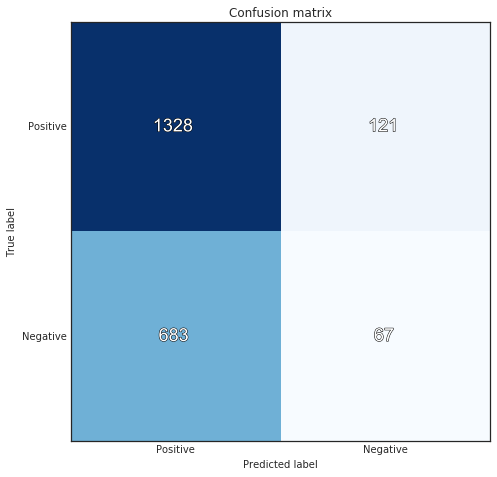

In [68]:
preds = et.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

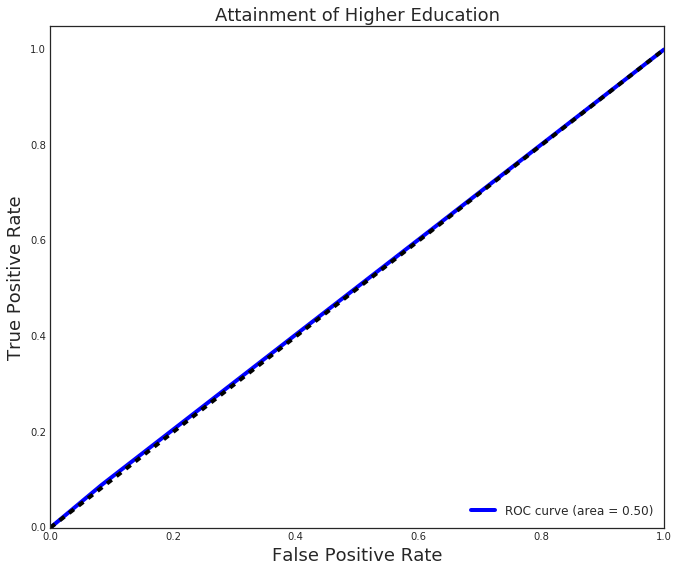

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [70]:
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsrf.fit(X1, y)
print gsrf.best_params_
print gsrf.best_score_

all_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'gini', 'max_depth': 3, 'class_weight': None}
0.659252183406
[[1449    0]
 [ 750    0]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.00      0.00      0.00       750

avg / total       0.43      0.66      0.52      2199



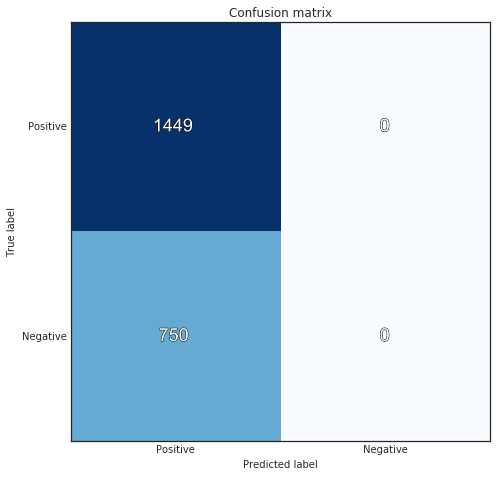

In [71]:
preds = gsrf.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

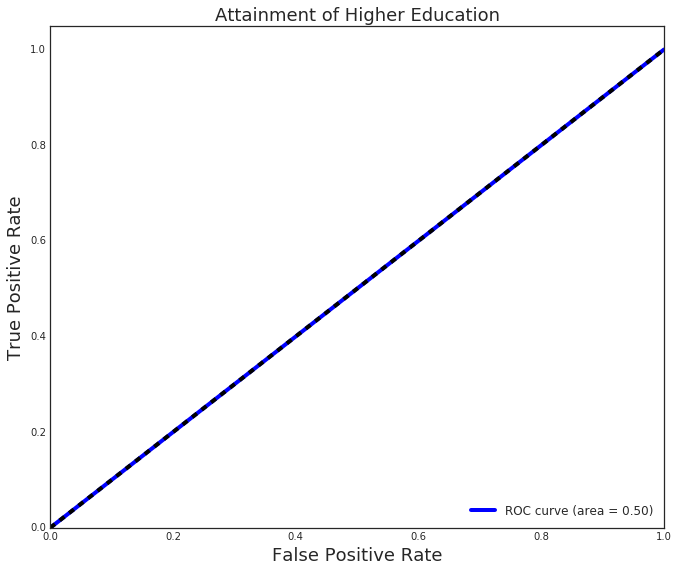

In [72]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [73]:
gset = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gset.fit(X1, y)
print gset.best_params_
print gset.best_score_

all_models['gset'] = {'model': gset.best_estimator_,
                      'score': evaluate_model(gset.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 3, 'criterion': 'entropy', 'max_depth': 3, 'class_weight': None}
0.659388646288
[[1449    0]
 [ 750    0]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.00      0.00      0.00       750

avg / total       0.43      0.66      0.52      2199



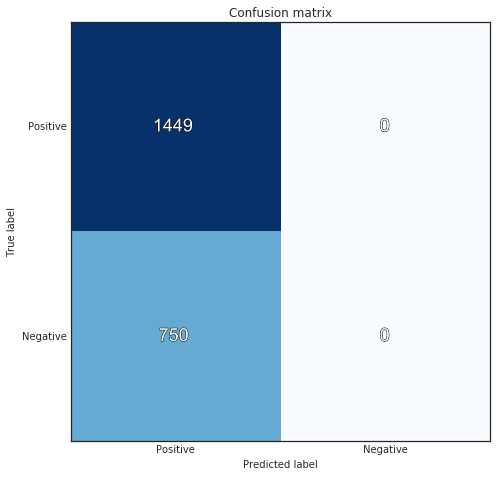

In [74]:
preds = gset.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

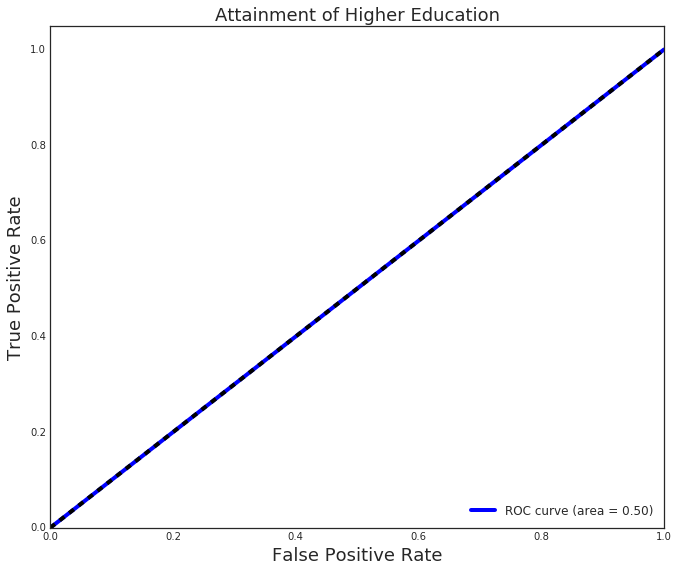

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

,score
model,
gsbagginglr,0.658936
gsrf,0.658936
gsbaggingsvm,0.658936
gslr,0.658936
gsbaggingdt,0.658936
lr,0.658936
gset,0.658936
gssvm,0.658936
svm,0.658481


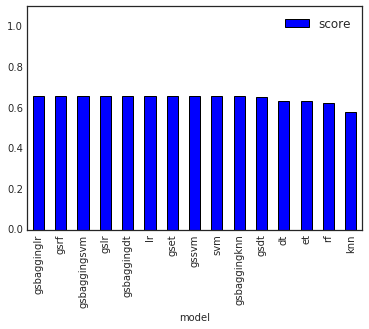

In [76]:
scores = pd.DataFrame([(k, v['score']) for k, v in all_models.iteritems()],
             columns=['model', 'score']).set_index('model').sort_values('score', ascending=False)


scores.plot(kind='bar')
plt.ylim(0.0, 1.1)

scores

In [77]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold

def retest(model):
    scores = cross_val_score(model, X1, y,
                             cv=StratifiedKFold(y, shuffle=True),
                             n_jobs=-1)
    m = scores.mean()
    s = scores.std()
    
    return m, s

for k, v in all_models.iteritems():
    cvres = retest(v['model'])
    print k, 
    all_models[k]['cvres'] = cvres

knn gsbagginglr gsrf svm et gsbaggingsvm gslr rf gsbaggingdt gsdt lr gset gssvm gsbaggingknn dt


,score,error
model,,
gsbaggingdt,0.659252,0.000170
gsbagginglr,0.659116,0.000127
gsbaggingsvm,0.659116,0.000127
gslr,0.659116,0.000127
lr,0.659116,0.000127
gssvm,0.659116,0.000127
gsrf,0.658979,0.000279
gset,0.658979,0.000279
svm,0.658706,0.000652


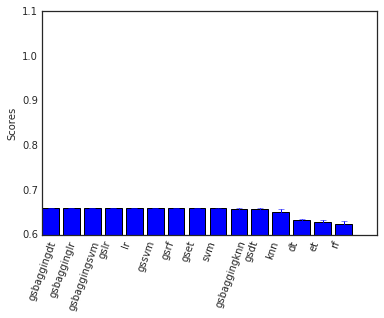

In [78]:
cvscores = pd.DataFrame([(k, v['cvres'][0], v['cvres'][1] ) for k, v in all_models.iteritems()],
                        columns=['model', 'score', 'error']).set_index('model').sort_values('score', ascending=False)



fig, ax = plt.subplots()
rects1 = ax.bar(range(len(cvscores)), cvscores.score,
                yerr=cvscores.error,
                tick_label=cvscores.index)

ax.set_ylabel('Scores')
plt.xticks(rotation=70)
plt.ylim(0.6, 1.1)

# cvscores.to_csv('../../../5.2-lesson/assets/datasets/car_evaluation/model_comparison.csv')
cvscores